# Matrices aleatorias, decoherencia, caos cuántico


In [34]:
function GOE(dim)#se crea la función para en ensamble de matrices aleatorias GOE
   (x -> (x+x')/2)(randn(dim,dim))
end

GOE (generic function with 1 method)

In [35]:
function GUE(dim)#se crea la función para en ensamble de matrices aleatorias GUE
  (x -> (x+x')/2)(randn(dim,dim)+im*randn(dim,dim))
    end

GUE (generic function with 1 method)

In [36]:
Sz=[1 0;0 -1]#se crea el operador matriz de pauli Sigma Z

2×2 Array{Int64,2}:
 1   0
 0  -1

In [37]:
function I(n)
    f = zeros(n*n) #Se crea un vector de n^2 ceros.
    
    i = 1 #Se inicia el valor del índice que corresponde a los elementos 
    #de la matriz cuyo valor es 1
    
    while i < n*n+1 #Se asigna el valor 1 a los índices de la diagonal.
        f[i] = 1
        i = i + n + 1
    end
    
    A = reshape(f,(n,n))
    return A
end

I (generic function with 1 method)

In [38]:
a=3#En esta función de crea un Hamiltoniano definido como:
function H(n)
H=(a/2)*kron(Sz,I(n))+ kron(I(2),GUE(n))+GOE(2*n)
end

H (generic function with 1 method)

In [39]:
h=H(15)

30×30 Array{Complex{Float64},2}:
    1.45512+0.0im        -1.27986+0.133069im   …     1.03973+0.0im      
   -1.27986-0.133069im   0.783837+0.0im            -0.877062+0.0im      
    1.14598-1.02309im    0.599194-0.901847im        0.396221+0.0im      
  -0.788458+0.58061im    0.186087-1.80992im        -0.253892-0.0im      
   -1.61383-0.620142im  -0.237519+0.515279im       -0.928127+0.0im      
  -0.150646+0.602161im   -0.18632-0.205116im   …   -0.106165+0.0im      
   -0.39759+0.755425im  -0.701603+0.188958im        -1.03044+0.0im      
  -0.703577-0.974996im   0.653698-1.07913im        -0.954863-0.0im      
   0.582099-0.32387im   -0.581492-0.476198im        0.606244+0.0im      
   0.188337-0.927095im    1.56438-0.640164im        -0.16267+0.0im      
   -1.27842+0.793869im    0.55186-0.18269im    …  -0.0165247-0.0im      
  -0.237677+0.632805im  -0.209514-0.0288022im       0.141454+0.0im      
   0.637556+0.667077im   -1.01832+1.13763im         0.885426+0.0im      
           ⋮      

In [40]:
#dim del estado inicial es 100
function random_state(dim)#En esta función se crean estados factorizables aleatorios
    v=kron([1,0],randn(dim,1))
    v=v/norm(v)
    return v
end


random_state (generic function with 1 method)

In [41]:

t=0:0.1:100;#se crea una lista de tiempo

In [42]:
function projector(state)#se crea el operador de proyección
    return state*state'
end

projector (generic function with 1 method)

In [43]:
V=random_state(15)

30×1 Array{Float64,2}:
  0.0535877  
  0.000804421
  0.506518   
 -0.226593   
 -0.191202   
  0.157662   
  0.1434     
 -0.0291314  
  0.555287   
 -0.346902   
  0.299109   
  0.0670492  
 -0.0323638  
  ⋮          
 -0.0        
 -0.0        
  0.0        
  0.0        
 -0.0        
  0.0        
 -0.0        
  0.0        
  0.0        
 -0.0        
  0.0        
 -0.0        

In [44]:
rho = []
#en este for se evoluciona el estado dado en V usando el operador de evolución temporal
for i in 1:length(t)
    psi=(expm(-im*h*t[i]))*(projector(V))*(expm(im*h*t[i]))
    psi=psi/norm(psi)#se normaliza el estado 
    push!(rho,psi)
    
end

return rho# se regresa la lista de la evolución del estado V

1001-element Array{Any,1}:
 Complex{Float64}[0.00287164+0.0im 4.31071e-5+0.0im … 0.0+0.0im 0.0+0.0im; 4.31071e-5+0.0im 6.47094e-7+0.0im … 0.0+0.0im 0.0+0.0im; … ; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im; 0.0+0.0im 0.0+0.0im … 0.0+0.0im 0.0+0.0im]                                                                                                                                                                                                              
 Complex{Float64}[0.00254492-1.95156e-18im -0.00171413-0.00347653im … 0.00245861+0.00152885im 0.00259259+0.00311096im; -0.00171413+0.00347653im 0.00590372-3.68629e-18im … -0.00374451+0.00232887im -0.00599601+0.00144628im; … ; 0.00245861-0.00152885im -0.00374451-0.00232887im … 0.00329368-3.25261e-19im 0.00437356+0.00144796im; 0.00259259-0.00311096im -0.00599601-0.00144628im … 0.00437356-0.00144796im 0.00644405+3.25261e-19im]
 Complex{Float64}[0.000435232-3.35425e-18im 0.00154784-0.00252665im … 0.000866811+0.00159225im -0.000340446+0.0026863

In [45]:
rho[3]

30×30 Array{Complex{Float64},2}:
  0.000435232-3.35425e-18im  …  -0.000340446+0.00268631im 
   0.00154784+0.00252665im        -0.0168055+0.00757705im 
   0.00458476+0.000710901im      -0.00797406+0.0277417im  
  -0.00293457-0.00458482im         0.0305935-0.0145262im  
  -0.00114144-0.000257339im       0.00248118-0.00684381im 
   0.00195757-0.00454658im   …     0.0265308+0.0156388im  
   0.00138483+0.00525634im         -0.033526+0.00443576im 
   0.00103443-0.000228922im      0.000603789+0.00656368im 
   0.00541421+0.00533371im        -0.0371554+0.0292451im  
  -0.00376581+0.00401394im        -0.0218289-0.0263828im  
   0.00549596+0.00100759im   …     -0.010518+0.0331336im  
 -0.000845343-0.00696612im          0.043657+0.000231455im
  -0.00263519-0.004636im           0.0306753-0.0126384im  
             ⋮               ⋱                            
  0.000870193-0.00371415im         0.0222435+0.00827622im 
  -0.00159541-0.000713813im       0.00565371-0.00928874im 
   0.00114974-0.0001099

In [46]:

function partial_trace_pure_bipartite_mat(state,dim,system)
    dimtotal=length(state)[1]
    dimcomp=Int(dimtotal/dim)
    psi=reshape(state,(dimcomp,dim))'
    if system==1
        psi=conj(psi)
        return psi*psi'
        elseif system==2
        return psi'*psi
    end
end

partial_trace_pure_bipartite_mat (generic function with 1 method)

In [47]:
partial=[]
for i in 1:length(rho)
trace=partial_trace_pure_bipartite_mat(rho[i],2,1)
push!(partial,trace)
end
return partial

1001-element Array{Any,1}:
 Complex{Float64}[1.0+0.0im 0.0+0.0im; 0.0-0.0im 0.0+0.0im]                                    
 Complex{Float64}[0.950172+0.0im 0.0273438+0.0567381im; 0.0273438-0.0567381im 0.0498276+0.0im] 
 Complex{Float64}[0.839544+0.0im 0.0649804+0.0629304im; 0.0649804-0.0629304im 0.160456+0.0im]  
 Complex{Float64}[0.727982+0.0im 0.0559447+0.00320251im; 0.0559447-0.00320251im 0.272018+0.0im]
 Complex{Float64}[0.643079+0.0im 0.0163506-0.0645272im; 0.0163506+0.0645272im 0.356921+0.0im]  
 Complex{Float64}[0.604863+0.0im 0.00783568-0.0724457im; 0.00783568+0.0724457im 0.395137+0.0im]
 Complex{Float64}[0.634326+0.0im 0.0538512-0.0125427im; 0.0538512+0.0125427im 0.365674+0.0im]  
 Complex{Float64}[0.703821+0.0im 0.110556+0.0706523im; 0.110556-0.0706523im 0.296179+0.0im]    
 Complex{Float64}[0.730921+0.0im 0.119819+0.128508im; 0.119819-0.128508im 0.269079+0.0im]      
 Complex{Float64}[0.662857+0.0im 0.0747031+0.134816im; 0.0747031-0.134816im 0.337143+0.0im]    
 Complex{Floa

In [48]:
densit2=[]
for i in 1:length(rho)
densit = (partial[i])*(partial[i])
    push!(densit2,densit)
end
return densit2

1001-element Array{Any,1}:
 Complex{Float64}[1.0+0.0im 0.0+0.0im; 0.0+0.0im 0.0+0.0im]                                    
 Complex{Float64}[0.906794+0.0im 0.0273438+0.0567381im; 0.0273438-0.0567381im 0.00644969+0.0im]
 Complex{Float64}[0.713016+0.0im 0.0649804+0.0629304im; 0.0649804-0.0629304im 0.033929+0.0im]  
 Complex{Float64}[0.533097+0.0im 0.0559447+0.00320251im; 0.0559447-0.00320251im 0.077134+0.0im]
 Complex{Float64}[0.417981+0.0im 0.0163506-0.0645272im; 0.0163506+0.0645272im 0.131824+0.0im]  
 Complex{Float64}[0.371169+0.0im 0.00783568-0.0724457im; 0.00783568+0.0724457im 0.161443+0.0im]
 Complex{Float64}[0.405427+0.0im 0.0538512-0.0125427im; 0.0538512+0.0125427im 0.136775+0.0im]  
 Complex{Float64}[0.512579+0.0im 0.110556+0.0706523im; 0.110556-0.0706523im 0.104936+0.0im]    
 Complex{Float64}[0.565116+0.0im 0.119819+0.128508im; 0.119819-0.128508im 0.103275+0.0im]      
 Complex{Float64}[0.463136+0.0im 0.0747031+0.134816im; 0.0747031-0.134816im 0.137421+0.0im]    
 Complex{Floa

In [49]:
densit2[4]

2×2 Array{Complex{Float64},2}:
  0.533097+0.0im         0.0559447+0.00320251im
 0.0559447-0.00320251im   0.077134+0.0im       

In [50]:
traza=[]
for i in 1:length(densit2)
traz=trace(densit2[i])
    push!(traza,traz)
end
return traza

1001-element Array{Any,1}:
      1.0+0.0im
 0.913244+0.0im
 0.746945+0.0im
 0.610231+0.0im
 0.549805+0.0im
 0.532612+0.0im
 0.542202+0.0im
 0.617515+0.0im
 0.668391+0.0im
 0.600557+0.0im
 0.521694+0.0im
  0.51227+0.0im
 0.527519+0.0im
         ⋮     
 0.519934+0.0im
 0.535179+0.0im
 0.550162+0.0im
 0.538129+0.0im
 0.533813+0.0im
 0.512608+0.0im
 0.518613+0.0im
 0.564995+0.0im
 0.642251+0.0im
 0.672145+0.0im
 0.629409+0.0im
 0.591431+0.0im

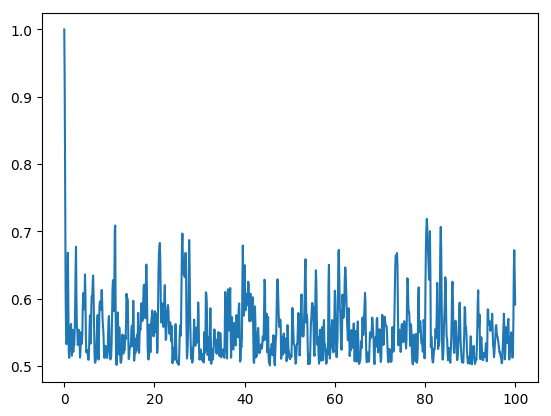

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcc23d97410>

In [51]:
using PyPlot
plot(t,traza)